# Data Science Capstone Final Project - Price Classification of Mobile Phones
### By Zhen Zhang

## Introduction
>* This is data capstone project. The dataset was taken from Kaggle. The full database contains 21 features of mobile phone of varies companies.There are two datasets, one is train.csv(2000 rows and 21 columns), another is test.csv (1000 rows and 21 columns). The aim of this project is “find out the relation between features of mobile phone" and using the machine learning technique to predict the right price range of a mobile phone in the competitive mobile phone market.

## 1. Load Packages and Datasets

In [434]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import missingno as msno
import math
import random
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
from sklearn import svm, datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import torch
import torchvision
from torch.autograd import Variable
import torch.utils.data as data_utils

In [435]:
# import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## 2. Data Overview

In [436]:
# check the data frame for train dataset
df_train.head()

battery_power blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842   no          2.2         0   1       0           7    0.6   
1           1021  yes          0.5         1   0       1          53    0.7   
2            563  yes          0.5         1   2       1          41    0.9   
3            615  yes          2.5         0   0       0          10    0.8   
4           1821  yes          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores     ...      px_height  px_width   ram  sc_h  sc_w  \
0        188        2     ...             20       756  2549     9     7   
1        136        3     ...            905      1988  2631    17     3   
2        145        5     ...           1263      1716  2603    11     2   
3        131        6     ...           1216      1786  2769    16     8   
4        141        2     ...           1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi price_range  
0         19        0             0   yes           1  
1          7        1             1    no           2  
2          9        1             1    no           2  
3         11        1             0    no           2  
4         15        1             1    no           1  

[5 rows x 21 columns]

In [437]:
## check the data frame for test dataset
df_test.head()

id  battery_power blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043  yes          1.8         1  14       0           5   
1   2            841  yes          0.5         1   4       1          61   
2   3           1807  yes          2.8         0   1       0          27   
3   4           1546   no          0.5         1  18       1          25   
4   5           1434   no          1.4         0  11       1          49   

   m_dep  mobile_wt  ...   pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...   16        226      1412  3476    12     7   
1    0.8        191  ...   12        746       857  3895     6     0   
2    0.9        186  ...    4       1270      1366  2396    17    10   
3    0.5         96  ...   20        295      1752  3893    10     0   
4    0.5        108  ...   18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1    no  
1          7        1             0    no  
2         10        0             1   yes  
3          7        1             1    no  
4          7        1             0   yes  

[5 rows x 21 columns]

In [438]:
all_columns_train = df_train.columns.tolist()
all_columns_train

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [439]:
all_columns_test = df_test.columns.tolist()
all_columns_test

['id',
 'battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

#### Data Description
>* This dataset contains 42000 observations, and 21 variables.

| Variable Name: | Variable Description: | 
| -- | -- | 
|battery_power|Total energy a battery can store in one time measured in mAh   
|blue|Has bluetooth or not   
|clock_speed|speed at which microprocessor executes instructions  
|dual_sim|Has dual sim support or not   
|fc|Front Camera mega pixels  
|four_g|Has 4G or not        
|int_memory|Internal Memory in Gigabytes  
|m_dep|Mobile Depth in cm  
|mobile_wt|Weight of mobile phone  
|n_cores|Number of cores of processor   
|pc|Primary Camera mega pixels              
|px_height|Pixel Resolution Height   
|px_width|Pixel Resolution Width   
|ram|Random Access Memory in Mega Bytes  
|sc_h|Screen Height of mobile in cm   
|sc_w|Screen Width of mobile in cm  
|talk_time|longest time that a single battery charge will last when you are   
|three_gHas|3G or not  
|touch_screen|Has touch screen or not  
|wifi|Has wifi or not   
|price_range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost) 

In [440]:
# get dimensionally of our dataset
train_shape=df_train.shape
test_shape=df_test.shape
print(train_shape)
print(test_shape)

(2000, 21)
(1000, 21)


In [441]:
df_train.dtypes

battery_power      int64
blue              object
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi              object
price_range        int64
dtype: object

In [442]:
df_test.dtypes

id                 int64
battery_power      int64
blue              object
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi              object
dtype: object

## 3. Initial Statistics Analysis for Training set

In [443]:
df_train.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
price_range       2.25     3.0

## 4. Exploratory data analysis
##### 1）Check Missing Value

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

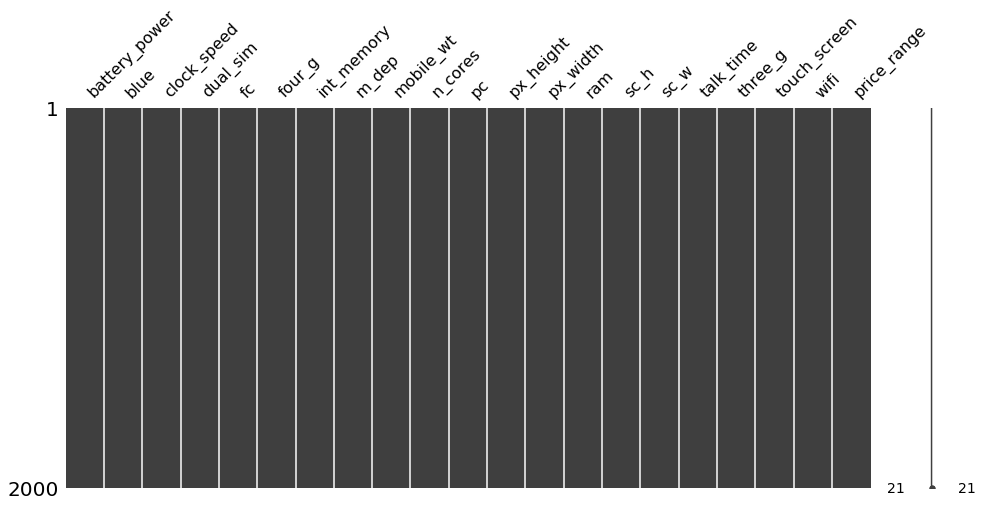

In [444]:
# find the number of missing values for each variable of train dataset
msno.matrix(df_train.sample(2000),
            figsize=(16, 7),
            width_ratios=(15, 1))
df_train.isnull().sum() 

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

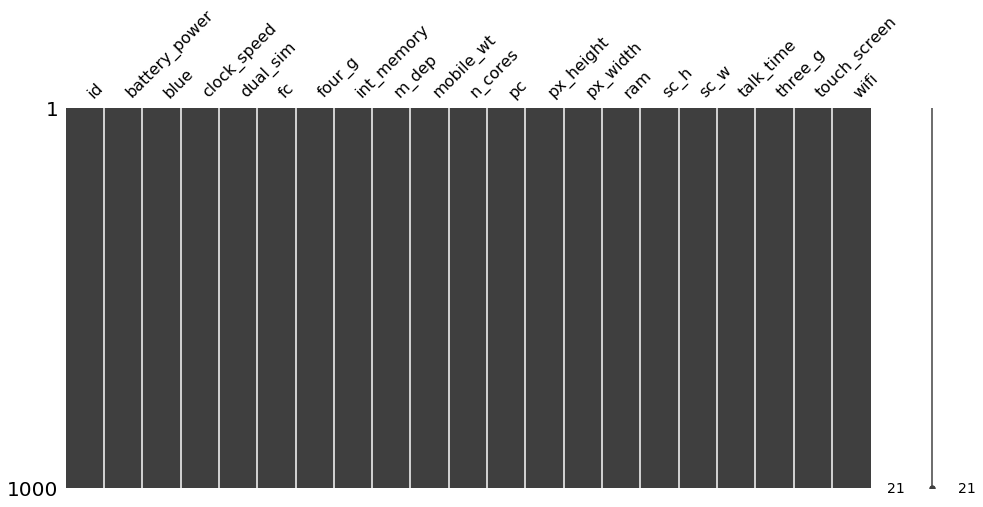

In [445]:
# find the number of missing values for each variable of test dataset
msno.matrix(df_test.sample(1000),
            figsize=(16, 7),
            width_ratios=(15, 1))
df_test.isnull().sum()

##### 2) Handle with Categorial Variable

In [446]:
# find out the number of columns that are "object" in training set
print("Data types and their frequency\n{}".format(df_train.dtypes.value_counts()))

Data types and their frequency
int64      17
object      2
float64     2
dtype: int64


In [447]:
#get format for value of each object column for training set
object_columns_df = df_train.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

blue     no
wifi    yes
Name: 0, dtype: object


In [448]:
#explore the number of unique value of each object column in traing set
cols = ['blue','wifi']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')
#every obejct column in my dataset contain discrete categorical values
#I can use the one-hot encoding to handle them

blue :
no     1010
yes     990
Name: blue, dtype: int64 

wifi :
yes    1014
no      986
Name: wifi, dtype: int64 



In [449]:
# Since the value of our obeject columns are the nominal values,
#I encode them as dummy variables

In [450]:
dummy_df_train = pd.get_dummies(df_train[cols])
dummy_df_train.head()

blue_no  blue_yes  wifi_no  wifi_yes
0        1         0        0         1
1        0         1        1         0
2        0         1        1         0
3        0         1        1         0
4        0         1        1         0

In [451]:
data_train = pd.concat([dummy_df_train,df_train], axis=1)
data_train = data_train.drop(cols, axis=1)
data_train.head()

blue_no  blue_yes  wifi_no  wifi_yes  battery_power  clock_speed  dual_sim  \
0        1         0        0         1            842          2.2         0   
1        0         1        1         0           1021          0.5         1   
2        0         1        1         0            563          0.5         1   
3        0         1        1         0            615          2.5         0   
4        0         1        1         0           1821          1.2         0   

   fc  four_g  int_memory     ...       pc  px_height  px_width   ram  sc_h  \
0   1       0           7     ...        2         20       756  2549     9   
1   0       1          53     ...        6        905      1988  2631    17   
2   2       1          41     ...        6       1263      1716  2603    11   
3   0       0          10     ...        9       1216      1786  2769    16   
4  13       1          44     ...       14       1208      1212  1411     8   

   sc_w  talk_time  three_g  touch_screen  price_range  
0     7         19        0             0            1  
1     3          7        1             1            2  
2     2          9        1             1            2  
3     8         11        1             0            2  
4     2         15        1             1            1  

[5 rows x 23 columns]

In [452]:
# find out the number of columns that are "object" in test set
df_test.head()
print("Data types and their frequency\n{}".format(df_test.dtypes.value_counts()))

Data types and their frequency
int64      17
object      2
float64     2
dtype: int64


In [453]:
#get format for value of each object column for test set
object_columns_df = df_test.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

blue    yes
wifi     no
Name: 0, dtype: object


In [454]:
#explore the number of unique value of each object column in test set
cols = ['blue','wifi']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')
#every obejct column in my dataset contain discrete categorical values
#I can use the one-hot encoding to handle them

blue :
yes    516
no     484
Name: blue, dtype: int64 

wifi :
yes    507
no     493
Name: wifi, dtype: int64 



In [455]:
dummy_df_test = pd.get_dummies(df_test[cols])
data_test = pd.concat([df_test, dummy_df_test], axis=1)
data_test = data_test.drop(cols, axis=1)
data_test.head()

id  battery_power  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0   1           1043          1.8         1  14       0           5    0.1   
1   2            841          0.5         1   4       1          61    0.8   
2   3           1807          2.8         0   1       0          27    0.9   
3   4           1546          0.5         1  18       1          25    0.5   
4   5           1434          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores    ...      ram  sc_h  sc_w  talk_time  three_g  \
0        193        3    ...     3476    12     7          2        0   
1        191        5    ...     3895     6     0          7        1   
2        186        3    ...     2396    17    10         10        0   
3         96        8    ...     3893    10     0          7        1   
4        108        6    ...     1773    15     8          7        1   

   touch_screen  blue_no  blue_yes  wifi_no  wifi_yes  
0             1        0         1        1         0  
1             0        0         1        1         0  
2             1        0         1        0         1  
3             1        1         0        1         0  
4             0        1         0        0         1  

[5 rows x 23 columns]

####  3) Narrow Down Columns
##### <1> Delete Columns

In [456]:
# Train the Random Forest model for raw data
# to check whether there have the useless columns or not
train_x = data_train.iloc[:, :22].values
train_y = data_train.iloc[:, 22].values
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0, random_state=0)
random_forest_model = RandomForestClassifier(n_estimators=10,max_features=int(math.sqrt(22)), max_depth=None,min_samples_split=2, bootstrap=True)
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [457]:
# Get the importance of each feature to price range 
importance_list = random_forest_model.feature_importances_
feature_list = data_train.columns.values.tolist()
feature_dict = {}
for i in range(len(importance_list)):
    feature_dict[feature_list[i]] = [importance_list[i]]
feature_frame = pd.DataFrame(feature_dict)
feature_frame = feature_frame.T.sort_values([0], ascending=False).T
feature_frame.head()
#from output, we can clearly see there are no useless columns
# "ram" and "battery_power" are most important to the price range

ram  battery_power  px_height  px_width  mobile_wt        pc  \
0  0.468801       0.071139   0.058881   0.05285    0.04174  0.033917   

   int_memory      sc_w  talk_time  clock_speed    ...        m_dep   n_cores  \
0    0.032342  0.031874   0.030219     0.028243    ...     0.024403  0.022997   

   touch_screen    four_g  blue_yes  wifi_yes   blue_no  dual_sim   three_g  \
0      0.007476  0.007267  0.006866  0.006097  0.005803  0.005649  0.005409   

    wifi_no  
0  0.004832  

[1 rows x 22 columns]

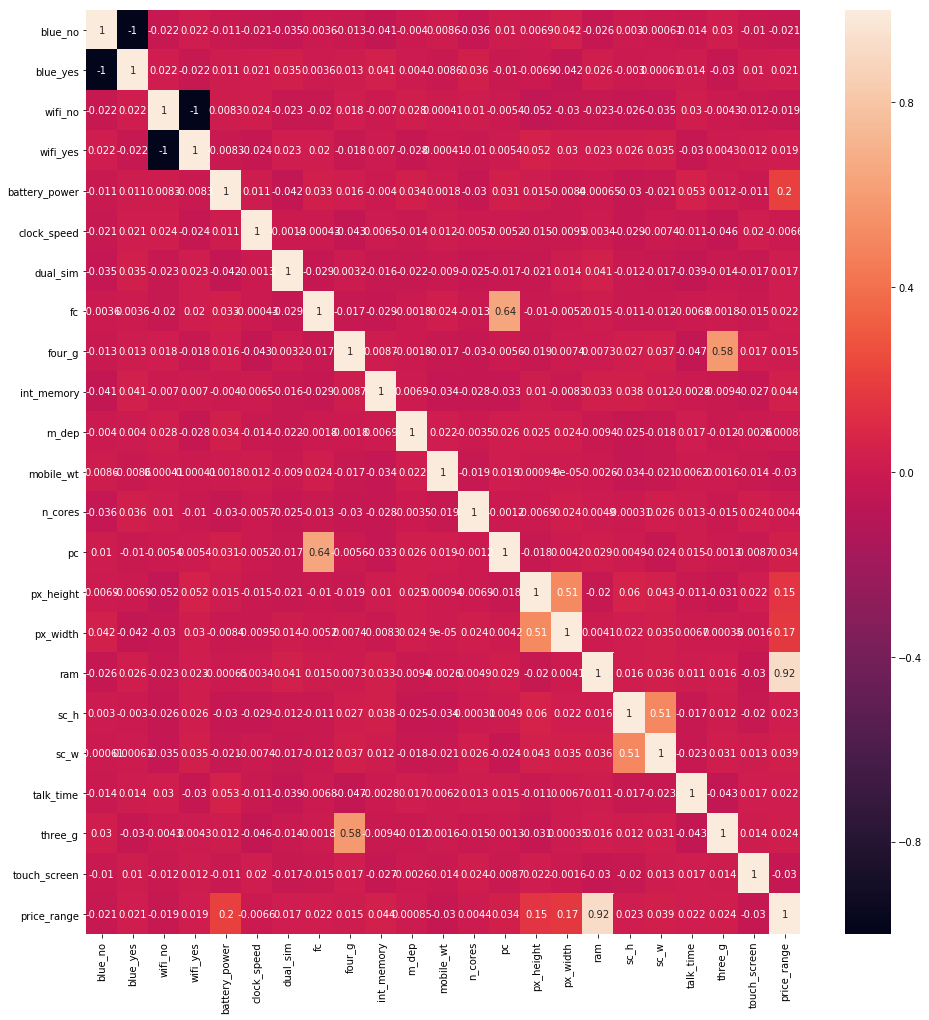

In [458]:
# calculate the correlation of each variable
# to see whether there have linearly dependent columns or not
corr = data_train.corr()
plt.figure(figsize=(16,17))
sb.heatmap(corr, annot=True)
plt.show()
# Here, I found the indicators "pc" and "fc" have the strong correlation (absolute value is greater than 0.6)
# I decided to drop the "fc"

In [459]:
drops=['fc']
data_train = data_train.drop(drops, axis=1)
data_train.head()

blue_no  blue_yes  wifi_no  wifi_yes  battery_power  clock_speed  dual_sim  \
0        1         0        0         1            842          2.2         0   
1        0         1        1         0           1021          0.5         1   
2        0         1        1         0            563          0.5         1   
3        0         1        1         0            615          2.5         0   
4        0         1        1         0           1821          1.2         0   

   four_g  int_memory  m_dep     ...       pc  px_height  px_width   ram  \
0       0           7    0.6     ...        2         20       756  2549   
1       1          53    0.7     ...        6        905      1988  2631   
2       1          41    0.9     ...        6       1263      1716  2603   
3       0          10    0.8     ...        9       1216      1786  2769   
4       1          44    0.6     ...       14       1208      1212  1411   

   sc_h  sc_w  talk_time  three_g  touch_screen  price_range  
0     9     7         19        0             0            1  
1    17     3          7        1             1            2  
2    11     2          9        1             1            2  
3    16     8         11        1             0            2  
4     8     2         15        1             1            1  

[5 rows x 22 columns]

In [460]:
drops=['fc']
data_test = data_test.drop(drops, axis=1)
data_test.head()

id  battery_power  clock_speed  dual_sim  four_g  int_memory  m_dep  \
0   1           1043          1.8         1       0           5    0.1   
1   2            841          0.5         1       1          61    0.8   
2   3           1807          2.8         0       0          27    0.9   
3   4           1546          0.5         1       1          25    0.5   
4   5           1434          1.4         0       1          49    0.5   

   mobile_wt  n_cores  pc    ...      ram  sc_h  sc_w  talk_time  three_g  \
0        193        3  16    ...     3476    12     7          2        0   
1        191        5  12    ...     3895     6     0          7        1   
2        186        3   4    ...     2396    17    10         10        0   
3         96        8  20    ...     3893    10     0          7        1   
4        108        6  18    ...     1773    15     8          7        1   

   touch_screen  blue_no  blue_yes  wifi_no  wifi_yes  
0             1        0         1        1         0  
1             0        0         1        1         0  
2             1        0         1        0         1  
3             1        1         0        1         0  
4             0        1         0        0         1  

[5 rows x 22 columns]

In [461]:
# Encode three_g and four_g into network
def encodeNetwork(three_g, four_g):
    if three_g:
        if four_g:
            return 4
        else:
            return 3
    else:
        if four_g:
            return 1
        else:
            return 0

col_name = data_train.columns.tolist()
col_name.insert(1, 'network')
data_train['network'] = data_train.apply(lambda record: encodeNetwork(record.three_g, record.four_g), axis = 1)
data_train = data_train.reindex(columns=col_name)
data_train.drop(labels=['three_g', 'four_g'], axis=1, inplace= True)
data_train.head()
#“3” indicates “three_g”, “3” indicates “four_g”, “0” indicates neither “three_g” nor “four_g”. 

blue_no  network  blue_yes  wifi_no  wifi_yes  battery_power  clock_speed  \
0        1        0         0        0         1            842          2.2   
1        0        4         1        1         0           1021          0.5   
2        0        4         1        1         0            563          0.5   
3        0        3         1        1         0            615          2.5   
4        0        4         1        1         0           1821          1.2   

   dual_sim  int_memory  m_dep     ...       n_cores  pc  px_height  px_width  \
0         0           7    0.6     ...             2   2         20       756   
1         1          53    0.7     ...             3   6        905      1988   
2         1          41    0.9     ...             5   6       1263      1716   
3         0          10    0.8     ...             6   9       1216      1786   
4         0          44    0.6     ...             2  14       1208      1212   

    ram  sc_h  sc_w  talk_time  touch_screen  price_range  
0  2549     9     7         19             0            1  
1  2631    17     3          7             1            2  
2  2603    11     2          9             1            2  
3  2769    16     8         11             0            2  
4  1411     8     2         15             1            1  

[5 rows x 21 columns]

In [462]:
data_train.shape

(2000, 21)

In [463]:
data_test['network'] = data_test.apply(lambda record: encodeNetwork(record.three_g, record.four_g), axis = 1)
data_test.drop(labels=['three_g', 'four_g'], axis=1, inplace= True)
data_test.head()

id  battery_power  clock_speed  dual_sim  int_memory  m_dep  mobile_wt  \
0   1           1043          1.8         1           5    0.1        193   
1   2            841          0.5         1          61    0.8        191   
2   3           1807          2.8         0          27    0.9        186   
3   4           1546          0.5         1          25    0.5         96   
4   5           1434          1.4         0          49    0.5        108   

   n_cores  pc  px_height   ...      ram  sc_h  sc_w  talk_time  touch_screen  \
0        3  16        226   ...     3476    12     7          2             1   
1        5  12        746   ...     3895     6     0          7             0   
2        3   4       1270   ...     2396    17    10         10             1   
3        8  20        295   ...     3893    10     0          7             1   
4        6  18        749   ...     1773    15     8          7             0   

   blue_no  blue_yes  wifi_no  wifi_yes  network  
0        0         1        1         0        0  
1        0         1        1         0        4  
2        0         1        0         1        0  
3        1         0        1         0        4  
4        1         0        0         1        4  

[5 rows x 21 columns]

In [464]:
data_test.shape

(1000, 21)

In [465]:
data_train.shape

(2000, 21)

In [466]:
#make sure all indicators have same length and see the shape of our data set
data_train.info()
print(data_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
blue_no          2000 non-null uint8
network          2000 non-null int64
blue_yes         2000 non-null uint8
wifi_no          2000 non-null uint8
wifi_yes         2000 non-null uint8
battery_power    2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
touch_screen     2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(15), uint8(4)
memory usage: 273.5 KB
(2000, 21)


In [467]:
data_test.info()
print(data_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
id               1000 non-null int64
battery_power    1000 non-null int64
clock_speed      1000 non-null float64
dual_sim         1000 non-null int64
int_memory       1000 non-null int64
m_dep            1000 non-null float64
mobile_wt        1000 non-null int64
n_cores          1000 non-null int64
pc               1000 non-null int64
px_height        1000 non-null int64
px_width         1000 non-null int64
ram              1000 non-null int64
sc_h             1000 non-null int64
sc_w             1000 non-null int64
talk_time        1000 non-null int64
touch_screen     1000 non-null int64
blue_no          1000 non-null uint8
blue_yes         1000 non-null uint8
wifi_no          1000 non-null uint8
wifi_yes         1000 non-null uint8
network          1000 non-null int64
dtypes: float64(2), int64(15), uint8(4)
memory usage: 136.8 KB
(1000, 21)


#### 4) Visualization of  Remaining Variable!
#####  Univariate Analysis
##### Independent Variable

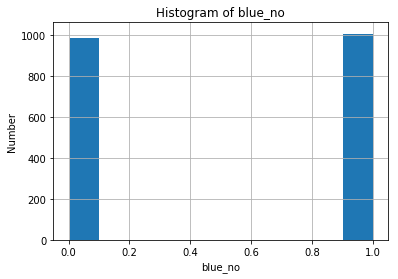

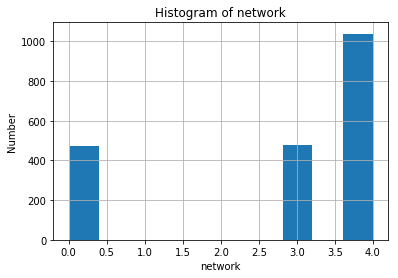

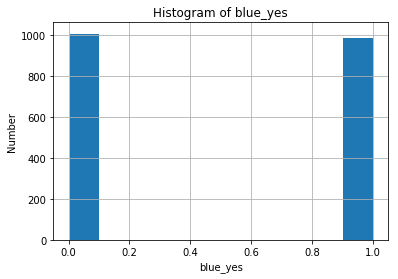

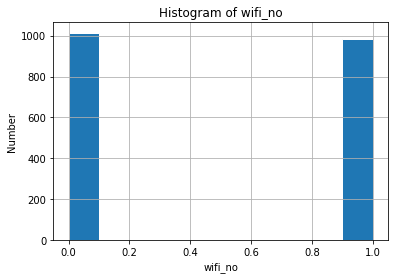

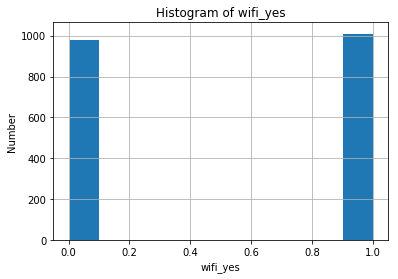

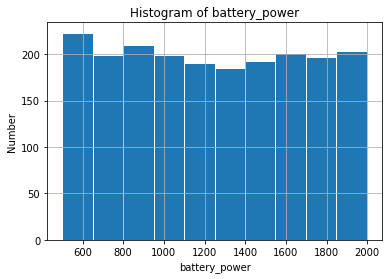

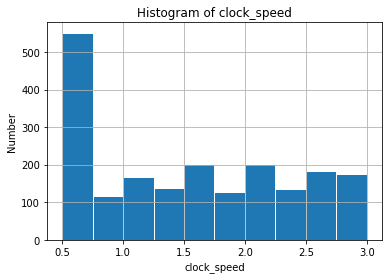

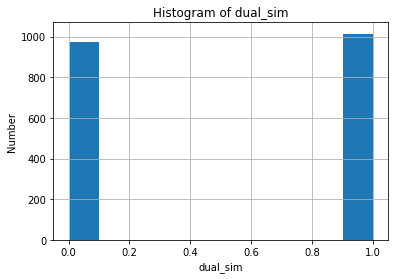

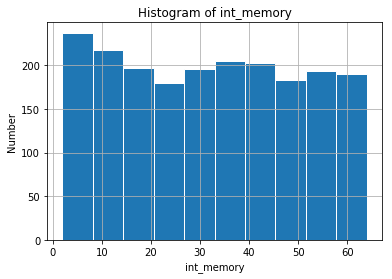

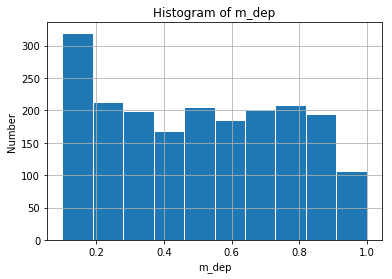

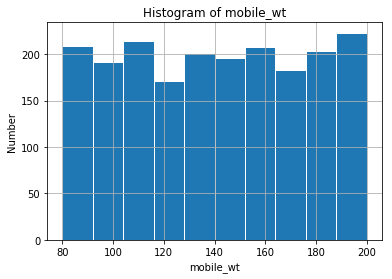

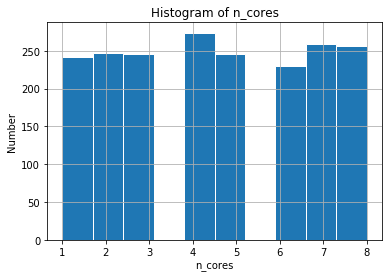

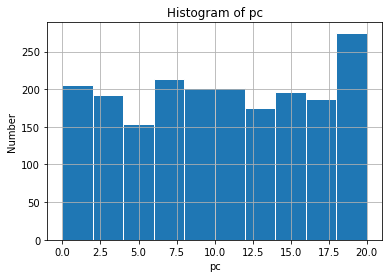

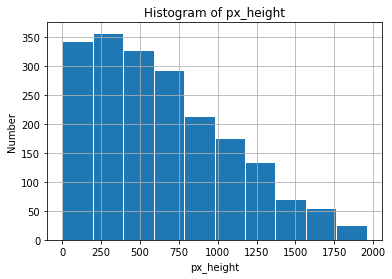

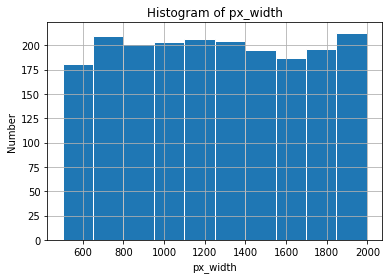

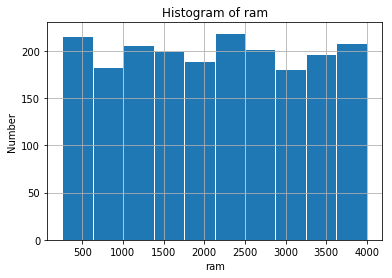

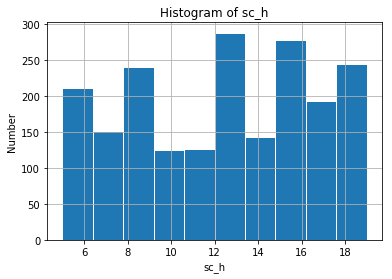

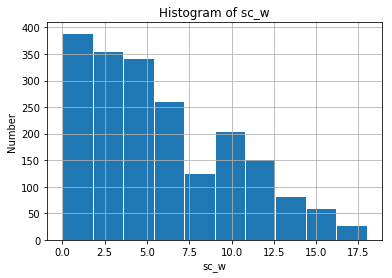

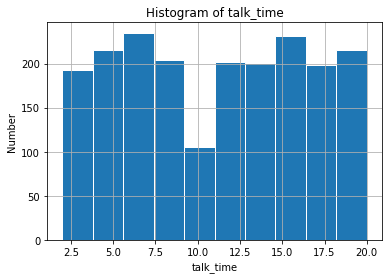

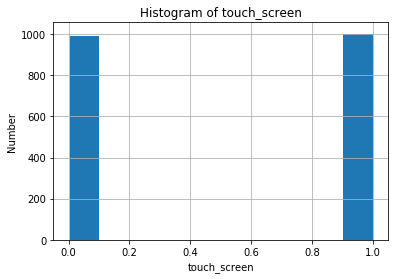

In [468]:
# visualizate the remaining variable
var_list = data_train.columns.values.tolist()[:20]
for label in var_list:
    data_train[label].hist(edgecolor='white', grid=True)
    plt.xlabel(label)
    plt.ylabel("Number")
    plt.title("Histogram of "+label)
    plt.show()

##### Target Value Analysis-dependent variable

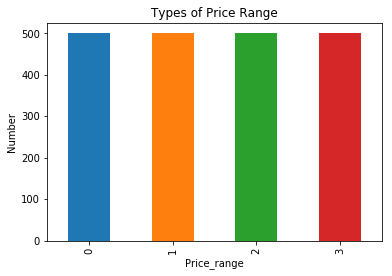

In [469]:
price_types=pd.value_counts(data_train['price_range'], sort= True).sort_index()
price_types.plot(kind = 'bar')
plt.title('Types of Price Range')
plt.xlabel('Price_range')
plt.ylabel("Number")
price_types=pd.value_counts(data_train['price_range'], sort= True).sort_index()
plt.show();
#each price range has the same number
#which means the data is balance

<function matplotlib.pyplot.show(*args, **kw)>

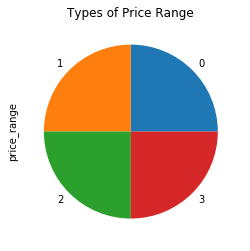

In [470]:
price_types.plot(kind = 'pie')
plt.title('Types of Price Range')
plt.show

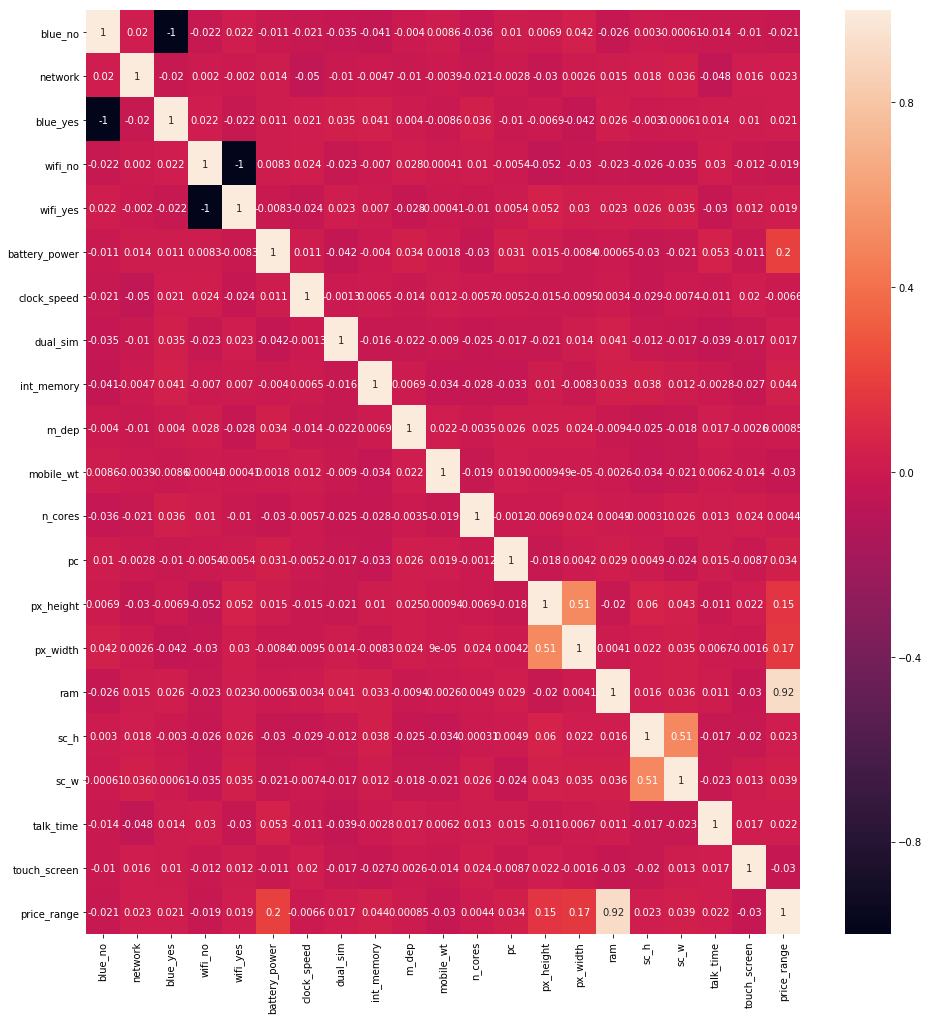

In [471]:
corr = data_train.corr()
plt.figure(figsize=(16,17))
sb.heatmap(corr, annot=True)
plt.show()

#### Firstly, we see there are moderate correlation(>0.5) between  "px_width" and "px_height", "sc_w" and "sc_h". Therefore, we want to further explore the relationship between these features.

##### 1)The relationship between  'px_width' and 'px_height'

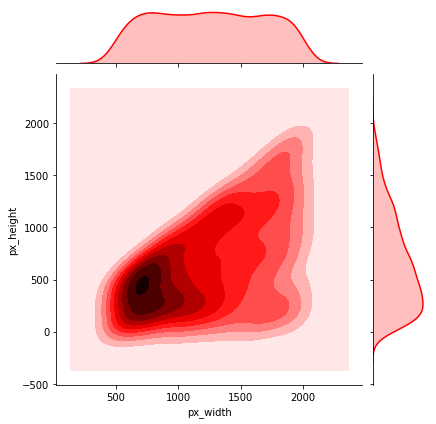

In [472]:
#use the jointplot to see the binary distribution
sb.jointplot(x='px_width',y='px_height',kind="kde", color="r",data=data_train)

##### 3) The relationship between "sc_w" and "sc_h"

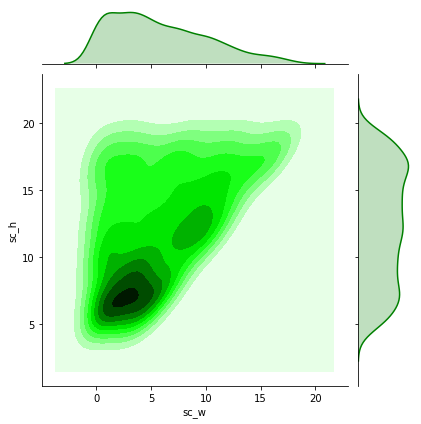

In [473]:
sb.jointplot(x='sc_w',y='sc_h',kind="kde", color="g",data=data_train)

#### Secondly, from the heatmap, we can also clearly find the "ram", "battery_power" are most related to our target varible- "price_range". Therefore, I will explore the relationship between these features and price-range.

##### How does price-range affect by the ram

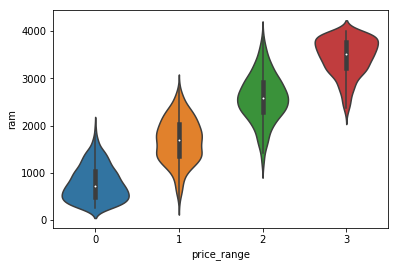

In [474]:
sb.violinplot(x='price_range',y='ram', data=data_train)
#the wide space represents more data in this interval 
#for the lower price (price range=0), the ram of the most mobile phone is also small; 
#the higher price (price range = 3), the ram of the most phone is also large.

#### Boxplot
>* N=1.5IQR  
>* Q1-N > Outliers > Q3+N

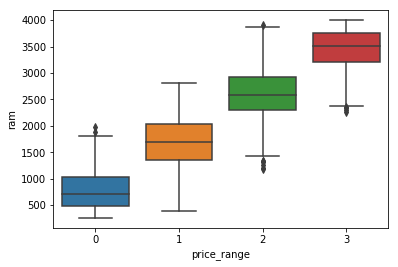

In [475]:
sb.boxplot(x="price_range", y="ram", data=data_train)
# price range “0”, “2”, “3” have outliers

##### How does price_range affect by the battery_power

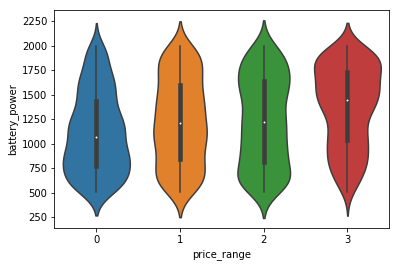

In [476]:
sb.violinplot(x='price_range',y='battery_power',data=data_train)
#the positive correlation is not particularly obvious, especially for the price interval “1” and “2”
#for the price “0”, most samples have small battery capacity
#but there are most of samples have big battery capacity in the price range “3”.

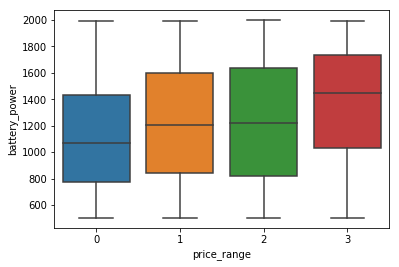

In [477]:
sb.boxplot(x="price_range", y="battery_power", data=data_train)

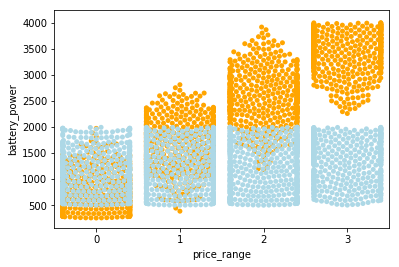

In [478]:
# overall relationship between the “ ram”, “battery_power”, and “price_range” to make the project diversity
sb.swarmplot(x='price_range',y='ram',data=data_train,color='orange')
sb.swarmplot(x='price_range',y='battery_power',data=data_train,color='lightblue')

## 3. Model-Machine Learning Part

#### Data Pre-processing

In [479]:
# Prepare data for model
def splitTrainTestSetBin(dataframe, per):
    df_x = dataframe.iloc[:, :20]
    df_x_norm = (df_x - df_x.min()) / (df_x.max() - df_x.min())
    x = df_x_norm.values
    y = dataframe.iloc[:, 20].values
    # Binarize the output
    y_binary = label_binarize(y, classes=[0, 1, 2, 3])
    n_classes = y_binary.shape[1]
    #n_classes = 4
    x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=per, random_state=0)
    return x_train, x_test, y_train, y_test, n_classes

def splitTrainTestSet(dataframe, per):
    df_x = dataframe.iloc[:, :20]
    df_x_norm = (df_x - df_x.min()) / (df_x.max() - df_x.min())
    x = df_x_norm.values
    y = dataframe.iloc[:, 20].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=per, random_state=0)
    return x_train, x_test, y_train, y_test

# Get the training/testing dataset
train_x_binary, test_x_binary, train_y_binary, test_y_binary, num_classes = splitTrainTestSetBin(data_train, 0.3)
train_x, test_x, train_y, test_y = splitTrainTestSet(data_train, 0.3)
# Convert the data into the same scale
stdsc = StandardScaler()
train_x = stdsc.fit_transform(train_x)
test_x = stdsc.transform(test_x)

#### Machine Learning Part
##### a) Naive Bayes

In [480]:
# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(train_x, train_y)

#test the model
pred_y = nb_clf.predict(test_x)

#Calculate accuracy to compare the prediction with the target value
accuracy_nb_clf = []
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))
for i in range(len(test_y)):
    label = test_y[i]
    class_correct[label] += (test_y[i]==pred_y[i])
    class_total[label] += 1
    
for i in range(num_classes):
    accuracy_nb_clf.append(np.round(100 * class_correct[i] / class_total[i], 2))
    

# Calculate the precision score
precision_nb_clf = np.round(precision_score(test_y, pred_y, average=None)*100,2)

# Calculate recall score
recall_nb_clf = np.round(recall_score(test_y, pred_y, average=None)*100,2)

#Calculate the F1 score
f1_nb_clf = np.round(f1_score(test_y, pred_y, average=None)*100,2)
print('The accuracy of naive bayes classifier is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (accuracy_nb_clf[0], accuracy_nb_clf[1], accuracy_nb_clf[2], accuracy_nb_clf[3]))
print('The precision of naive bayes classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (precision_nb_clf[0], precision_nb_clf[1], precision_nb_clf[2], precision_nb_clf[3]))
print('The recall score of naive bayes classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (recall_nb_clf[0], recall_nb_clf[1], recall_nb_clf[2], recall_nb_clf[3]))
print('The f1 score of naive bayes classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (f1_nb_clf[0], f1_nb_clf[1], f1_nb_clf[2], f1_nb_clf[3]))

The accuracy of naive bayes classifier is 93.38(Class 0), 71.85(Class 1), 71.52(Class 2), 92.02(Class 3).
The precision of naive bayes classifier on test set is 93.38(Class 0), 74.05(Class 1), 72.48(Class 2), 88.76(Class 3).
The recall score of naive bayes classifier on test set is 93.38(Class 0), 71.85(Class 1), 71.52(Class 2), 92.02(Class 3).
The f1 score of naive bayes classifier on test set is 93.38(Class 0), 72.93(Class 1), 72.00(Class 2), 90.36(Class 3).


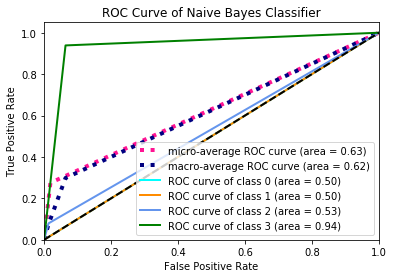

In [481]:
# Naive Bayes
nb_clf = OneVsRestClassifier(GaussianNB())
nb_clf.fit(train_x, train_y_binary)

#test the model
pred_y = nb_clf.predict(test_x_binary)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_binary[:, i], pred_y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_binary.ravel(), pred_y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
lw = 2
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

#### In conclusion, the Naïve Bayes Classifier works well for the price range 1

##### b) Support Vector Machine (SVM)

In [482]:
# SVM
svm_clf = svm.LinearSVC(C=5.0,max_iter=10000)
svm_clf.fit(train_x, train_y)
pred_y = svm_clf.predict(test_x)

#Calculate accuracy
accuracy_svm_clf = []
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))
for i in range(len(test_y)):
    label = test_y[i]
    class_correct[label] += (test_y[i]==pred_y[i])
    class_total[label] += 1
    
for i in range(num_classes):
    accuracy_svm_clf.append(np.round(100 * class_correct[i] / class_total[i], 2))

# Calculate the precision score
precision_svm_clf = np.round(precision_score(test_y, pred_y, average=None)*100,2)

# Calculate recall score
recall_svm_clf = np.round(recall_score(test_y, pred_y, average=None)*100,2)

#Calculate the F1 score
f1_svm_clf = np.round(f1_score(test_y, pred_y, average=None)*100,2)
print('The accuracy of svm classifier is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (accuracy_svm_clf[0], accuracy_svm_clf[1], accuracy_svm_clf[2], accuracy_svm_clf[3]))
print('The precision of svm classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (precision_svm_clf[0], precision_svm_clf[1], precision_svm_clf[2], precision_svm_clf[3]))
print('The recall score of svm classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (recall_svm_clf[0], recall_svm_clf[1], recall_svm_clf[2], recall_svm_clf[3]))
print('The f1 score of svm classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (f1_svm_clf[0], f1_svm_clf[1], f1_svm_clf[2], f1_svm_clf[3]))

The accuracy of svm classifier is 100.00(Class 0), 72.59(Class 1), 72.85(Class 2), 99.39(Class 3).
The precision of svm classifier on test set is 94.97(Class 0), 73.13(Class 1), 78.57(Class 2), 97.01(Class 3).
The recall score of svm classifier on test set is 100.00(Class 0), 72.59(Class 1), 72.85(Class 2), 99.39(Class 3).
The f1 score of svm classifier on test set is 97.42(Class 0), 72.86(Class 1), 75.60(Class 2), 98.18(Class 3).


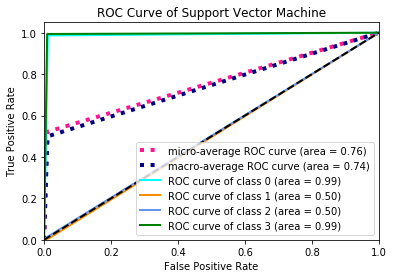

In [483]:
svm_clf = OneVsRestClassifier(svm.LinearSVC(C=5.0,max_iter=10000))
svm_clf.fit(train_x_binary, train_y_binary)
pred_y = svm_clf.predict(test_x_binary)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_binary[:, i], pred_y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_binary.ravel(), pred_y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
lw = 2
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Support Vector Machine')
plt.legend(loc="lower right")
plt.show()


#### Thus, SVM classifier has the better performance on price range 0 and price range 3.

#### 1) Decision Tree

In [484]:
# Decision Tree
bdt_discrete = DecisionTreeClassifier(max_depth=2)
bdt_discrete.fit(train_x, train_y)
pred_y = bdt_discrete.predict(test_x)

#Calculate accuracy
accuracy_dt_clf = []
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))
for i in range(len(test_y)):
    label = test_y[i]
    class_correct[label] += (test_y[i]==pred_y[i])
    class_total[label] += 1
    
for i in range(num_classes):
    accuracy_dt_clf.append(np.round(100 * class_correct[i] / class_total[i], 2))


# Calculate the precision score
precision_dt_clf = np.round(precision_score(test_y, pred_y, average=None)*100,2)

# Calculate recall score
recall_dt_clf = np.round(recall_score(test_y, pred_y, average=None)*100,2)

#Calculate the F1 score
f1_dt_clf = np.round(f1_score(test_y, pred_y, average=None)*100,2)

print('The accuracy of decision classifier is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (accuracy_dt_clf[0], accuracy_dt_clf[1], accuracy_dt_clf[2], accuracy_dt_clf[3]))
print('The precision of decision tree classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (precision_dt_clf[0], precision_dt_clf[1], precision_dt_clf[2], precision_dt_clf[3]))
print('The recall score of decision tree classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (recall_dt_clf[0], recall_dt_clf[1], recall_dt_clf[2], recall_dt_clf[3]))
print('The f1 score of decision tree classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (f1_dt_clf[0], f1_dt_clf[1], f1_dt_clf[2], f1_dt_clf[3]))

The accuracy of decision classifier is 82.12(Class 0), 71.85(Class 1), 60.26(Class 2), 79.14(Class 3).
The precision of decision tree classifier on test set is 87.32(Class 0), 61.39(Class 1), 62.76(Class 2), 83.23(Class 3).
The recall score of decision tree classifier on test set is 82.12(Class 0), 71.85(Class 1), 60.26(Class 2), 79.14(Class 3).
The f1 score of decision tree classifier on test set is 84.64(Class 0), 66.21(Class 1), 61.49(Class 2), 81.13(Class 3).


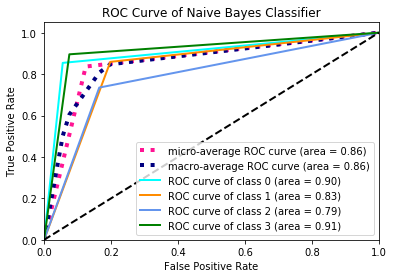

In [485]:
bdt_discrete = OneVsRestClassifier(DecisionTreeClassifier(max_depth=2))
bdt_discrete.fit(train_x_binary, train_y_binary)
pred_y = bdt_discrete.predict(test_x_binary)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_binary[:, i], pred_y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_binary.ravel(), pred_y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
lw = 2
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

#### The results show the Decision Tree classifier has the better performance on price range 0 and price range 3 compare to other price range

### Neural Network Part
##### Multilayer Perceptron

In [486]:
# Machine Learning - MLP
BATCH_SIZE = 50
NUM_EPOCHS = 2000
LEARNING_RATE = 0.005
HIDDEN_NODE = 100
SEED_START = 10
LOSS_TARGET = 0.01
SEED_STEP = 5
# Model defined in PyTorch
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.inputLayer = torch.nn.Linear(20, HIDDEN_NODE)
        self.hiddenLayer1 = torch.nn.Linear(HIDDEN_NODE, HIDDEN_NODE)
        self.hiddenLayer2 = torch.nn.Linear(HIDDEN_NODE, HIDDEN_NODE)
        self.hiddenLayer3 = torch.nn.Linear(HIDDEN_NODE, HIDDEN_NODE)
        self.hiddenLayer4 = torch.nn.Linear(HIDDEN_NODE, HIDDEN_NODE)
        self.hiddenLayer5 = torch.nn.Linear(HIDDEN_NODE, HIDDEN_NODE)
        self.outputLayer = torch.nn.Linear(HIDDEN_NODE,4)
        
        
    def forward(self, inputs):
        tmpOut = torch.nn.functional.relu(self.inputLayer(inputs))
        tmpOut = torch.nn.functional.relu(self.hiddenLayer1(tmpOut))
        tmpOut = torch.nn.functional.relu(self.hiddenLayer2(tmpOut))
        tmpOut = torch.nn.functional.relu(self.hiddenLayer3(tmpOut))
        tmpOut = torch.nn.functional.relu(self.hiddenLayer4(tmpOut))
        tmpOut = torch.nn.functional.relu(self.hiddenLayer5(tmpOut))
        resOut = torch.nn.functional.relu(self.outputLayer(tmpOut))
        return resOut

best_loss = 1

# Prepare data loader for PyTorch
train = data_utils.TensorDataset(torch.FloatTensor(train_x), torch.LongTensor(train_y))
train_loader = data_utils.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
test = data_utils.TensorDataset(torch.FloatTensor(test_x), torch.LongTensor(test_y))
test_loader = data_utils.DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)

mlp_model = MLP()
best_model = mlp_model

while best_loss>LOSS_TARGET:
    random.seed(11)
    mlp_model = MLP()
    
    # cost func and optim
    optimizer = torch.optim.SGD(mlp_model.parameters(), lr=LEARNING_RATE, momentum=0.5)
    criterion = torch.nn.CrossEntropyLoss()
    
    for epoch in range(NUM_EPOCHS):
        for i, (data, target) in enumerate(train_loader):

            optimizer.zero_grad()

            x, y = Variable(data), Variable(target)
            #print y.squeeze()

            outputs = mlp_model(x)
            #print outputs
            #print y
            #print outputs
            loss = criterion(outputs, y)
            # Run back-propagation
            loss.backward()

            optimizer.step()

            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' % (epoch+1, NUM_EPOCHS, i+1, len(train)//BATCH_SIZE, loss.data[0]))
            if loss.data[0]<best_loss:
                best_model = mlp_model
                best_loss = loss.data[0]
                print('Find a better model with loss: %.4f' % best_loss)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/2000], Step [1/28], Loss: 1.3863
Epoch [1/2000], Step [2/28], Loss: 1.3908
Epoch [1/2000], Step [3/28], Loss: 1.3813
Epoch [1/2000], Step [4/28], Loss: 1.3931
Epoch [1/2000], Step [5/28], Loss: 1.3834
Epoch [1/2000], Step [6/28], Loss: 1.3839
Epoch [1/2000], Step [7/28], Loss: 1.3826
Epoch [1/2000], Step [8/28], Loss: 1.3924
Epoch [1/2000], Step [9/28], Loss: 1.3879
Epoch [1/2000], Step [10/28], Loss: 1.3892
Epoch [1/2000], Step [11/28], Loss: 1.3875
Epoch [1/2000], Step [12/28], Loss: 1.3850
Epoch [1/2000], Step [13/28], Loss: 1.3793
Epoch [1/2000], Step [14/28], Loss: 1.3845
Epoch [1/2000], Step [15/28], Loss: 1.3920
Epoch [1/2000], Step [16/28], Loss: 1.3914
Epoch [1/2000], Step [17/28], Loss: 1.3925
Epoch [1/2000], Step [18/28], Loss: 1.3921
Epoch [1/2000], Step [19/28], Loss: 1.3901
Epoch [1/2000], Step [20/28], Loss: 1.3824
Epoch [1/2000], Step [21/28], Loss: 1.3819
Epoch [1/2000], Step [22/28], Loss: 1.3841
Epoch [1/2000], Step [23/28], Loss: 1.3868
Epoch [1/2000], Step

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [187/2000], Step [20/28], Loss: 0.9423
Epoch [187/2000], Step [21/28], Loss: 0.8612
Find a better model with loss: 0.8612
Epoch [187/2000], Step [22/28], Loss: 0.9352
Epoch [187/2000], Step [23/28], Loss: 0.9369
Epoch [187/2000], Step [24/28], Loss: 0.9789
Epoch [187/2000], Step [25/28], Loss: 0.9841
Epoch [187/2000], Step [26/28], Loss: 0.9906
Epoch [187/2000], Step [27/28], Loss: 0.9124
Epoch [187/2000], Step [28/28], Loss: 0.9030
Epoch [188/2000], Step [1/28], Loss: 0.9170
Epoch [188/2000], Step [2/28], Loss: 0.9501
Epoch [188/2000], Step [3/28], Loss: 0.8780
Epoch [188/2000], Step [4/28], Loss: 1.0215
Epoch [188/2000], Step [5/28], Loss: 0.8589
Find a better model with loss: 0.8589
Epoch [188/2000], Step [6/28], Loss: 0.9497
Epoch [188/2000], Step [7/28], Loss: 0.9699
Epoch [188/2000], Step [8/28], Loss: 0.9401
Epoch [188/2000], Step [9/28], Loss: 0.9803
Epoch [188/2000], Step [10/28], Loss: 0.9110
Epoch [188/2000], Step [11/28], Loss: 0.9289
Epoch [188/2000], Step [12/28], L

In [487]:
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))
test_y_mlp = []
predict_y_mlp = []
accuracy_mlp = []
with torch.no_grad():
    for data in test_loader:
        x, y = data
        x, y = Variable(x), Variable(y)
        outputs = mlp_model(x)
        _, predicted = torch.max(outputs, 1)
        test_y_mlp.extend(y.numpy())
        predict_y_mlp.extend(predicted.numpy())
        c = (predicted == y).squeeze()
        for i in range(BATCH_SIZE):
            label = y[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(num_classes):
    accuracy_mlp.append(np.round(100 * class_correct[i] / class_total[i], 2))
    print('Accuracy of Class %d : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

Accuracy of Class 0 : 95 %
Accuracy of Class 1 : 88 %
Accuracy of Class 2 : 88 %
Accuracy of Class 3 : 94 %


In [488]:
# Calculate the precision score
precision_mlp = np.round(precision_score(test_y_mlp, predict_y_mlp, average=None)*100,2)

# Calculate recall score
recall_mlp = np.round(recall_score(test_y_mlp, predict_y_mlp, average=None)*100,2)

#Calculate the F1 score
f1_mlp = np.round(f1_score(test_y_mlp, predict_y_mlp, average=None)*100,2)
print('The precision of mlp classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (precision_mlp[0], precision_mlp[1], precision_mlp[2], precision_mlp[3]))
print('The recall score of mlp classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (recall_mlp[0], recall_mlp[1], recall_mlp[2], recall_mlp[3]))
print('The f1 score of mlp classifier on test set is %2.2f(Class 0), %2.2f(Class 1), %2.2f(Class 2), %2.2f(Class 3).'% (f1_mlp[0], f1_mlp[1], f1_mlp[2], f1_mlp[3]))

The precision of mlp classifier on test set is 94.12(Class 0), 88.15(Class 1), 89.26(Class 2), 94.48(Class 3).
The recall score of mlp classifier on test set is 95.36(Class 0), 88.15(Class 1), 88.08(Class 2), 94.48(Class 3).
The f1 score of mlp classifier on test set is 94.74(Class 0), 88.15(Class 1), 88.67(Class 2), 94.48(Class 3).


##### All index of all price range bigger than 80% which is good

# 4. Conclusion

### Models Comparison

In [489]:
# Compare the performance of different model
compareDF = pd.DataFrame({
    'Accuracy': {
        'Naive Bayes': np.mean(accuracy_nb_clf),
        'SVM': np.mean(accuracy_svm_clf),
        'Decision Tree': np.mean(accuracy_dt_clf),
        'MLP': np.mean(accuracy_mlp)
    },
    'Precision': {
        'Naive Bayes': np.mean(precision_nb_clf),
        'SVM': np.mean(precision_svm_clf),
        'Decision Tree': np.mean(precision_dt_clf),
        'MLP': np.mean(precision_mlp)
    },
    'Recall Score': {
        'Naive Bayes': np.mean(recall_nb_clf),
        'SVM': np.mean(recall_svm_clf),
        'Decision Tree': np.mean(recall_dt_clf),
        'MLP': np.mean(recall_mlp)
    },
    'F1 Score': {
        'Naive Bayes': np.mean(f1_nb_clf),
        'SVM': np.mean(f1_svm_clf),
        'Decision Tree': np.mean(f1_dt_clf),
        'MLP': np.mean(f1_mlp)
    }
})

compareDF.head()

Accuracy  Precision  Recall Score  F1 Score
Decision Tree   73.3425    73.6750       73.3425   73.3675
MLP             91.5175    91.5025       91.5175   91.5100
Naive Bayes     82.1925    82.1675       82.1925   82.1675
SVM             86.2075    85.9200       86.2075   86.0150

##### It clearly show that the performance of MLP is better than other models and every indictor for MLP is bigger than 90%
##### Therefore, I decided to choose the MLP as my model to predict the test.csv

#### Apply MLP to the test.csv

In [490]:
# Choose MLP as best model and apply to test file
df_x = data_test.iloc[:, :20]
df_x_norm = (df_x - df_x.min()) / (df_x.max() - df_x.min())
test_x = df_x_norm.values
test_y = list(0. for i in range(len(test_x)))
test = data_utils.TensorDataset(torch.FloatTensor(test_x), torch.LongTensor(test_y))
test_loader = data_utils.DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
predict_y = []
with torch.no_grad():
    for data in test_loader:
        x, y = data
        x, y = Variable(x), Variable(y)
        outputs = mlp_model(x)
        _, predicted = torch.max(outputs, 1)
        predict_y_mlp.extend(predicted.numpy())

In [491]:
# Display the predict result
print (predict_y_mlp)

[2, 1, 3, 0, 0, 3, 3, 0, 3, 3, 1, 0, 2, 0, 3, 2, 2, 3, 3, 0, 3, 0, 1, 2, 1, 0, 0, 3, 3, 2, 0, 1, 2, 3, 1, 2, 1, 2, 0, 0, 1, 3, 3, 1, 3, 3, 1, 0, 1, 2, 2, 1, 0, 3, 0, 2, 3, 1, 3, 1, 2, 3, 3, 0, 1, 2, 0, 0, 2, 3, 0, 2, 3, 1, 3, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 2, 1, 3, 1, 3, 0, 0, 3, 2, 2, 2, 0, 1, 0, 1, 2, 2, 3, 0, 0, 3, 1, 2, 2, 0, 1, 3, 0, 0, 3, 2, 0, 3, 2, 0, 0, 0, 3, 3, 0, 0, 0, 1, 0, 0, 3, 2, 1, 2, 1, 0, 3, 2, 2, 2, 0, 1, 0, 1, 3, 0, 3, 1, 1, 3, 1, 2, 0, 1, 3, 3, 1, 0, 1, 1, 1, 0, 1, 0, 3, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 3, 3, 2, 0, 0, 3, 2, 0, 2, 1, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 1, 0, 2, 2, 0, 2, 3, 0, 0, 2, 0, 1, 3, 2, 3, 2, 2, 1, 2, 1, 3, 2, 3, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 3, 3, 1, 3, 1, 1, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 3, 2, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 0, 1, 3, 1, 3, 3, 2, 2, 0, 0, 3, 1, 3, 0, 1, 0, 0, 0, 3, 1, 0, 0, 3, 0, 0, 3, 2, 3, 3, 1, 3, 2, 3, 1, 0, 0, 0, 3, 1, 1, 3, 1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 3, 1, 1, 2, 3, 3, 2, 2, 2, 3, 

#### In conclusion, there are store correlation between "fc" and "pc”. Besides, the ‘ram’, 'battery_power' is the most important variable for the price range, and MLP is best model to predict price range among all of the models that I built.